In [1]:
import pandas as pd
import numpy as np
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

Instrucciones:

1- Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.
    
2- Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

3- Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

4- Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

Nota: Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el inform

In [2]:
df_world = pd.read_csv("merge_world_2.csv")

In [54]:
df_world.shape

(195, 36)

In [3]:
df_world.head(3)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,longitud,latitud,continent
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa


2. ¿Qué columnas tienen nulos? 

In [4]:
# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
# y los pasamos a DataFrame
df_nulos = pd.DataFrame((df_world.isnull().sum() / df_world.shape[0]) * 100, columns=["%nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%nulos"] > 0]

,%nulos
abbreviation,3.589744
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
capital/majorcity,1.538462
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128


In [5]:
# Ordenamos de mayor a menor por la columna '%nulos' para verlo mejor
df_nulos_ordenado = df_nulos.sort_values(by='%nulos', ascending=False)
df_nulos_ordenado

,%nulos
minimumwage,23.076923
taxrevenue,13.333333
armedforcessize,12.307692
gasolineprice,10.256410
unemploymentrate,9.743590
populationlaborforceparticipation,9.743590
cpi,8.717949
cpichange,8.205128
continent,7.692308
currency-code,7.692308


________
# Primer análisis de los datos

Tenemos 2 columnas que no tienen ningún dato nulo, por lo tanto en este proceso las podremos obviar en esta fase. Son las columnas:  density y country.

- La columna con más porcentaje de nulos es "mininum wage", con un 23%. Decicimos mantenerla y gestionarla poniendo "unknown"
- El resto de columnas van del 0,5 al 13% de nulos. A continuación gestionaremos las columnas caso a caso para determinar de qué manera gestionarlo. Primero miraremos los valores categóricos y después los numéricos.

- Ésta decisión también vendrá  determinada por el tipo de datos con los que trabajamos y de la importáncia que éstos tengan en nuestro análisis. 




In [6]:
df_world.head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,longitud,latitud,continent
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.93911,67.709953,Asia


_____________________________
# Valores categóricos

In [7]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df_world[df_world.columns[df_world.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage', 'continent'],
      dtype='object')


In [8]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_world[col].value_counts() / df_world.shape[0])
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJORCITY


capital/majorcity
Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGESTCITY


largestcity
S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIALLANGUAGE


officiallanguage
English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: count, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna CONTINENT


continent
Africa           0.271795
Asia             0.235897
Europe           0.225641
Oceania          0.066667
South America    0.061538
North America    0.061538
Name: count, dtype: float64

........................


In [9]:
stats_descriptivas = pd.DataFrame()

for x in nulos_esta_cat:
    stats = df_world[x].describe()
    stats_descriptivas[x] = stats

In [10]:
stats_descriptivas

,abbreviation,capital/majorcity,currency-code,largestcity,officiallanguage,continent
count,188,192,180,189,190,180
unique,188,192,133,188,76,6
top,AF,Kabul,EUR,S����,English,Africa
freq,1,1,23,2,31,53


No tiene sentido substituir estos valores por la media o por la moda, por lo que creamos la categotía "Unknow" para clasificar todos estos valores nulos:

In [11]:
columnas_unknow = ['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage', 'continent', 'minimumwage']

# Nota: Hemos añadido "minimum wage" a la lista, ya que también se tenía que cambiar los nulos a categoría "Unknown"

In [12]:
for columna in columnas_unknow:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df_world[columna] = df_world[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_world[columnas_unknow].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation         0
capital/majorcity    0
currency-code        0
largestcity          0
officiallanguage     0
continent            0
minimumwage          0
dtype: int64

______

## Variables numéricas

In [13]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df_world[df_world.columns[df_world.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'longitud', 'latitud'],
      dtype='object')


In [14]:
# Calcularmos el porcentaje de nulos que tenemos en cada una de las columnas numéricas
# Pasamos los datos a Dataframe y llamamos a la columa con los datos '%nulos'
df_porcentaje_nulos_numericos = pd.DataFrame(df_world[nulos_esta_num].isnull().sum() / df_world.shape[0] * 100, columns=['%nulos'])
df_porcentaje_nulos_numericos

,%nulos
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128
fertilityrate,3.589744
forestedarea,3.589744


**Criterio para gestionar los nulos de las variables numéricas:**

1 - Las columnas con porcentajes inferiores o igual al 5% se pueden imputar por la media.

2- Aquellas columnas que tienen valores entre el 5-10% podemos optar por reemplazar por la media o mediana. Haremos una comparativa para valorar si se imputa con KNN Imputer o co Iterative Imputer

3- Hay tres columnas con valores superiores o igual al 10%: 
- armedforcessize
- gasolineprice
- taxrevenue

______________
1 -  Columnas con porcentajes inferiores o igual al 5%:

In [15]:
condicion_1 = df_porcentaje_nulos_numericos.loc[(df_porcentaje_nulos_numericos['%nulos']<= 5) & (df_porcentaje_nulos_numericos['%nulos']> 0)]
condicion_1.index

Index(['agriculturalland', 'landarea', 'birthrate', 'callingcode',
       'co2-emissions', 'fertilityrate', 'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'urban_population', 'longitud', 'latitud'],
      dtype='object')

In [16]:
condicion_1

,%nulos
agriculturalland,3.589744
landarea,0.512821
birthrate,3.076923
callingcode,0.512821
co2-emissions,3.589744
fertilityrate,3.589744
forestedarea,3.589744
gdp,1.025641
grossprimaryeducationenrollment,3.589744
infantmortality,3.076923


In [17]:
lista_condicion_1 = ['agriculturalland', 'landarea', 'birthrate', 'callingcode',
       'co2-emissions', 'fertilityrate', 'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'urban_population', 'longitud', 'latitud']

In [18]:
# para decidir si usamos la media o la mediana lo que haremos es hacer un describe de la columna para saber cuales son estos valores

df_world[lista_condicion_1].describe()

,agriculturalland,landarea,birthrate,callingcode,co2-emissions,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,lifeexpectancy,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,longitud,latitud
count,188.000000,1.940000e+02,189.000000,194.000000,1.880000e+02,188.000000,188.000000,1.930000e+02,188.000000,189.000000,187.000000,188.000000,188.000000,1.940000e+02,1.900000e+02,194.000000,194.000000
mean,39.117553,6.896244e+05,20.214974,360.546392,1.777992e+05,2.698138,32.015426,4.772959e+11,102.470213,21.332804,72.279679,32.637234,1.839840,3.938116e+07,2.230454e+07,19.092351,20.232434
std,21.783052,1.921609e+06,9.945774,323.236419,8.387903e+05,1.282267,23.791331,2.172173e+12,13.151607,19.548058,7.483661,19.172697,1.684261,1.450924e+08,7.543050e+07,23.961779,66.716110
min,0.600000,0.000000e+00,5.900000,1.000000,1.100000e+01,0.980000,0.000000,4.727146e+07,23.400000,1.400000,52.800000,0.200000,0.010000,8.360000e+02,5.464000e+03,-40.900557,-175.198242
25%,21.700000,2.382825e+04,11.300000,82.500000,2.304250e+03,1.705000,11.000000,8.454620e+09,98.950000,6.000000,67.000000,17.450000,0.332500,1.962678e+06,1.152961e+06,4.544175,-7.941496
50%,39.600000,1.195110e+05,17.950000,255.500000,1.230300e+04,2.245000,32.000000,3.438723e+10,102.550000,14.000000,73.200000,30.700000,1.460000,8.826588e+06,4.678104e+06,17.273849,20.972652
75%,55.375000,5.242560e+05,28.750000,506.750000,6.388425e+04,3.597500,48.175000,2.340940e+11,108.025000,32.700000,77.500000,43.975000,2.935000,2.858549e+07,1.490324e+07,40.124603,48.281523
max,82.600000,1.709824e+07,46.080000,1876.000000,9.893038e+06,6.910000,98.300000,2.142770e+13,142.500000,84.500000,85.400000,81.600000,8.420000,1.397715e+09,8.429340e+08,64.963051,178.065032


In [19]:
# Rellenamos por la media:

df_world[lista_condicion_1] = df_world[lista_condicion_1].fillna(df_world[lista_condicion_1].mean())

In [20]:
# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_world[lista_condicion_1].isnull().sum()} nulos")

Después del 'fillna' tenemos agriculturalland                   0
landarea                           0
birthrate                          0
callingcode                        0
co2-emissions                      0
fertilityrate                      0
forestedarea                       0
gdp                                0
grossprimaryeducationenrollment    0
infantmortality                    0
lifeexpectancy                     0
outofpockethealthexpenditure       0
physiciansperthousand              0
population                         0
urban_population                   0
longitud                           0
latitud                            0
dtype: int64 nulos


______

2- Gestionamos las columnas que estan entre el 5 y el 10% de nulos.
Haremos una comparativa para valorar si se imputa con KNN Imputer o co Iterative Imputer

In [21]:
condicion_2 = df_porcentaje_nulos_numericos.loc[(df_porcentaje_nulos_numericos['%nulos']> 5) & (df_porcentaje_nulos_numericos['%nulos']< 10)]
condicion_2.index

Index(['cpi', 'cpichange', 'grosstertiaryeducationenrollment',
       'maternalmortalityratio', 'populationlaborforceparticipation',
       'totaltaxrate', 'unemploymentrate'],
      dtype='object')

In [22]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_world_copia = df_world.copy()
df_world_copia .head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,longitud,latitud,continent
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.93911,67.709953,Asia


IterativeImputer

In [23]:
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_world_copia[['cpi', 'cpichange', 'grosstertiaryeducationenrollment',
       'maternalmortalityratio', 'populationlaborforceparticipation',
       'totaltaxrate', 'unemploymentrate']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

/Users/lluerna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([[149.9 ,   2.3 ,   9.7 , ...,  48.9 ,  71.4 ,  11.12],
       [119.05,   1.4 ,  55.  , ...,  55.7 ,  36.6 ,  12.33],
       [151.36,   2.  ,  51.4 , ...,  41.2 ,  66.1 ,  11.7 ],
       ...,
       [157.58,   8.1 ,  10.2 , ...,  38.  ,  26.6 ,  12.91],
       [212.31,   9.2 ,   4.1 , ...,  74.6 ,  15.6 ,  11.43],
       [105.51,   0.9 ,  10.  , ...,  83.1 ,  31.6 ,   4.95]])

In [24]:
# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear dos columnas nuevas
df_world_copia[['cpi_iterative', 'cpichange_iterative', 'grosstertiaryeducationenrollment_iterative', 'maternalmortalityratio_iterative', 'populationlaborforceparticipation_iterative', 'totaltaxrate_iterative', 'unemploymentrate_iterative']] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_world_copia[['cpi_iterative', 'cpichange_iterative', 'grosstertiaryeducationenrollment_iterative', 'maternalmortalityratio_iterative', 'populationlaborforceparticipation_iterative', 'totaltaxrate_iterative', 'unemploymentrate_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
cpi_iterative                                  0
cpichange_iterative                            0
grosstertiaryeducationenrollment_iterative     0
maternalmortalityratio_iterative               0
populationlaborforceparticipation_iterative    0
totaltaxrate_iterative                         0
unemploymentrate_iterative                     0
dtype: int64 nulos


KNNImputer

In [25]:
# Hacemos lo mismo con el KNNImputer. 

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_world_copia[['cpi', 'cpichange', 'grosstertiaryeducationenrollment', 'maternalmortalityratio', 'populationlaborforceparticipation','totaltaxrate', 'unemploymentrate']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

/Users/lluerna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/lluerna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([[149.9 ,   2.3 ,   9.7 , ...,  48.9 ,  71.4 ,  11.12],
       [119.05,   1.4 ,  55.  , ...,  55.7 ,  36.6 ,  12.33],
       [151.36,   2.  ,  51.4 , ...,  41.2 ,  66.1 ,  11.7 ],
       ...,
       [157.58,   8.1 ,  10.2 , ...,  38.  ,  26.6 ,  12.91],
       [212.31,   9.2 ,   4.1 , ...,  74.6 ,  15.6 ,  11.43],
       [105.51,   0.9 ,  10.  , ...,  83.1 ,  31.6 ,   4.95]])

In [26]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_world_copia[['cpi_knn', 'cpichange_knn', 'grosstertiaryeducationenrollment_knn', 'maternalmortalityratio_knn', 'populationlaborforceparticipation_knn','totaltaxrate_knn', 'unemploymentrate_knn']] = imputer_knn_imputado


# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_world_copia[['cpi_knn', 'cpichange_knn', 'grosstertiaryeducationenrollment_knn', 'maternalmortalityratio_knn', 'populationlaborforceparticipation_knn','totaltaxrate_knn', 'unemploymentrate_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
cpi_knn                                  0
cpichange_knn                            0
grosstertiaryeducationenrollment_knn     0
maternalmortalityratio_knn               0
populationlaborforceparticipation_knn    0
totaltaxrate_knn                         0
unemploymentrate_knn                     0
dtype: int64 nulos


Comparamos los datos con ambos metodos para decidir con cual nos quedamos. En función del método de imputación que más se asemeja al dato original. 

Como hay muchas columnas, lo miramos en dos partes:

1:

In [27]:
df_world_copia.describe()[['cpi','cpi_knn', 'cpi_iterative', 'cpichange', 'cpichange_knn','cpichange_iterative', 'grosstertiaryeducationenrollment','grosstertiaryeducationenrollment_knn','grosstertiaryeducationenrollment_iterative', 'maternalmortalityratio', 'maternalmortalityratio_knn', 'maternalmortalityratio_iterative']]

,cpi,cpi_knn,cpi_iterative,cpichange,cpichange_knn,cpichange_iterative,grosstertiaryeducationenrollment,grosstertiaryeducationenrollment_knn,grosstertiaryeducationenrollment_iterative,maternalmortalityratio,maternalmortalityratio_knn,maternalmortalityratio_iterative
count,178.000000,195.000000,195.000000,179.000000,195.000000,195.000000,183.000000,195.000000,195.000000,181.000000,195.000000,195.000000
mean,190.460955,188.044542,189.733384,6.722346,6.635378,6.684134,37.963388,37.912344,37.768805,160.392265,157.789426,160.021942
std,397.947380,380.285979,381.626934,24.450414,23.435360,23.483419,29.261022,28.357205,28.530212,233.502024,226.006843,225.688610
min,99.030000,99.030000,31.645208,-4.300000,-4.300000,-4.300000,0.800000,0.800000,-7.409868,2.000000,2.000000,-45.950535
25%,113.885000,114.415000,113.960000,1.000000,1.000000,1.000000,12.150000,12.650000,12.500000,13.000000,15.500000,15.500000
50%,125.340000,129.000000,127.630000,2.300000,2.500000,2.500000,31.200000,34.400000,34.600000,53.000000,60.000000,65.000000
75%,157.265000,162.605000,166.690000,4.250000,5.200000,5.500000,63.150000,61.100000,61.100000,186.000000,180.000000,184.000000
max,4583.710000,4583.710000,4583.710000,254.900000,254.900000,254.900000,136.600000,136.600000,136.600000,1150.000000,1150.000000,1150.000000


- cpi: Imputaremos por iterative
- cpichange: Imputaremos por iterative
- grosstertiaryeducationenrollment: Imputaremos por knn
- maternalmortalityratio: Imputaremos por knn

2:

In [28]:
df_world_copia.describe()[['populationlaborforceparticipation','populationlaborforceparticipation_knn','populationlaborforceparticipation_iterative','totaltaxrate','totaltaxrate_knn','totaltaxrate_iterative', 'unemploymentrate', 'unemploymentrate_knn', 'unemploymentrate_iterative']]

,populationlaborforceparticipation,populationlaborforceparticipation_knn,populationlaborforceparticipation_iterative,totaltaxrate,totaltaxrate_knn,totaltaxrate_iterative,unemploymentrate,unemploymentrate_knn,unemploymentrate_iterative
count,176.000000,195.000000,195.000000,183.000000,195.000000,195.000000,176.000000,195.000000,195.000000
mean,62.738068,62.621562,62.675735,40.822404,40.791073,40.851151,6.886364,6.958282,6.883611
std,10.502907,10.023457,9.992136,20.557662,19.952092,19.980598,5.079216,4.869590,4.824268
min,38.000000,38.000000,38.000000,8.000000,8.000000,8.000000,0.090000,0.090000,0.090000
25%,56.150000,56.850000,57.250000,30.600000,30.750000,30.900000,3.395000,3.490000,3.590000
50%,62.450000,62.600000,62.675735,37.200000,37.700000,37.700000,5.360000,5.650000,5.920000
75%,69.500000,68.300000,68.300000,48.000000,47.600000,47.600000,9.490000,9.090000,8.840000
max,86.800000,86.800000,86.800000,219.600000,219.600000,219.600000,28.180000,28.180000,28.180000


populationlaborforceparticipation: imputaremos por knn
totaltaxrate: imputaremos por iterative
unemploymentrate: imputaremos por  knn

In [30]:
#eliminamos las columnas que ya no nos interesan para guardar el DataFrame 
df_world_copia.drop(['cpi','cpi_knn', 'cpichange', 'cpichange_knn', 'grosstertiaryeducationenrollment','grosstertiaryeducationenrollment_iterative', 'maternalmortalityratio', 'maternalmortalityratio_iterative','populationlaborforceparticipation','populationlaborforceparticipation_iterative','totaltaxrate','totaltaxrate_knn', 'unemploymentrate', 'unemploymentrate_iterative' ], axis = 1, inplace = True)

# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {'cpi_iterative': 'cpi',  'cpichange_iterative': 'cpichange', 'grosstertiaryeducationenrollment_knn':'grosstertiaryeducationenrollment', 'maternalmortalityratio_knn': 'maternalmortalityratio', 'populationlaborforceparticipation_knn': 'populationlaborforceparticipation', 'totaltaxrate_iterative':'totaltaxrate', 'unemploymentrate_knn': 'unemploymentrate'  }
df_world_copia.rename(columns = nuevo_nombre, inplace = True)

________
3 - Miramos los valores atípicos con el diagrama de boxplot:

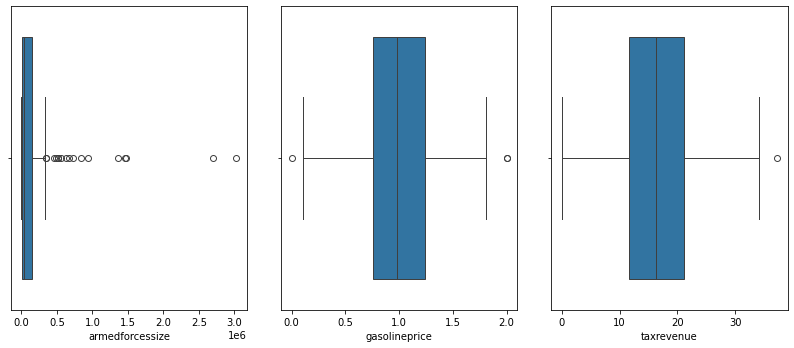

In [32]:
columnas_atipicas = ['armedforcessize', 'gasolineprice','taxrevenue' ]

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5)) 

axes = axes.flat

for indice, col in enumerate(columnas_atipicas):
    sns.boxplot(x = col, data = df_world_copia, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

Vemos que "armed forced size" es la columna que muestra más valores atípicos. 

1 - En éste caso, descartamos gestionar los nulos con la media, mediana o la moda. Lo pondremos como "Unknown"

2 - Las columnas gasolineprice y taxrevenue las analizaremos pcon KNN Imputer y Iterative Imputer para valorar si se pueden imputar con estos métodos. 


_________

1: ITERATIVE IMPUTER

In [34]:
# 1: 

# reemplazamos los nulos por la categoría Unknown para cada una de las columnas de la lista
df_world_copia['armedforcessize'] = df_world[columna].fillna("Unknown")

# comprobamos si quedan nulos en la columnas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_world_copia['armedforcessize'].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


0

2: KNN IMPUTER:

In [35]:
# instanciamos la clase del KNNImputer
imputer_knn_2 = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado_2 = imputer_knn.fit_transform(df_world_copia[['gasolineprice','taxrevenue']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado_2

/Users/lluerna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/lluerna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([[ 0.7       ,  9.3       ],
       [ 1.36      , 18.6       ],
       [ 0.28      , 37.2       ],
       [ 1.51      , 22.44      ],
       [ 0.97      ,  9.2       ],
       [ 0.99      , 16.5       ],
       [ 1.1       , 10.1       ],
       [ 0.77      , 20.9       ],
       [ 0.93      , 23.        ],
       [ 1.2       , 25.4       ],
       [ 0.56      , 13.        ],
       [ 0.92      , 14.8       ],
       [ 0.43      ,  4.2       ],
       [ 1.12      ,  8.8       ],
       [ 1.81      , 27.5       ],
       [ 0.6       , 14.7       ],
       [ 1.43      , 24.        ],
       [ 1.13      , 26.3       ],
       [ 0.72      , 10.8       ],
       [ 0.98      , 16.        ],
       [ 0.71      , 17.        ],
       [ 1.05      , 20.4       ],
       [ 0.71      , 19.5       ],
       [ 1.02      , 14.2       ],
       [ 0.37      ,  9.54      ],
       [ 1.11      , 20.2       ],
       [ 0.98      , 15.        ],
       [ 1.21      , 13.6       ],
       [ 0.93      ,

In [37]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_world_copia[['gasolineprice_knn','taxrevenue_knn']] = imputer_knn_imputado_2


# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_world_copia[['gasolineprice_knn','taxrevenue_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
gasolineprice_knn    0
taxrevenue_knn       0
dtype: int64 nulos


IterativeImputer

In [40]:
# instanciamos las clases
imputer_iterative_2 = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado_2 = imputer_iterative_2.fit_transform(df_world_copia[['gasolineprice','taxrevenue']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado_2

/Users/lluerna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([[ 0.7       ,  9.3       ],
       [ 1.36      , 18.6       ],
       [ 0.28      , 37.2       ],
       [ 1.51      , 21.32146501],
       [ 0.97      ,  9.2       ],
       [ 0.99      , 16.5       ],
       [ 1.1       , 10.1       ],
       [ 0.77      , 20.9       ],
       [ 0.93      , 23.        ],
       [ 1.2       , 25.4       ],
       [ 0.56      , 13.        ],
       [ 0.92      , 14.8       ],
       [ 0.43      ,  4.2       ],
       [ 1.12      ,  8.8       ],
       [ 1.81      , 27.5       ],
       [ 0.6       , 14.7       ],
       [ 1.43      , 24.        ],
       [ 1.13      , 26.3       ],
       [ 0.72      , 10.8       ],
       [ 0.98      , 16.        ],
       [ 0.71      , 17.        ],
       [ 1.05      , 20.4       ],
       [ 0.71      , 19.5       ],
       [ 1.02      , 14.2       ],
       [ 0.37      , 10.22179113],
       [ 1.11      , 20.2       ],
       [ 0.98      , 15.        ],
       [ 1.21      , 13.6       ],
       [ 0.93      ,

In [46]:
# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear dos columnas nuevas
df_world_copia[['gasolineprice_iterative','taxrevenue_iterative']] = imputer_iterative_imputado_2

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_world_copia[['gasolineprice_iterative','taxrevenue_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
gasolineprice_iterative    0
taxrevenue_iterative       0
dtype: int64 nulos


Comparamos los datos

In [47]:
df_world_copia.describe()[['gasolineprice','gasolineprice_knn','gasolineprice_iterative','taxrevenue', 'taxrevenue_knn', 'taxrevenue_iterative']]

,gasolineprice,gasolineprice_knn,gasolineprice_iterative,taxrevenue,taxrevenue_knn,taxrevenue_iterative
count,175.000000,195.000000,195.000000,169.000000,195.000000,195.000000
mean,1.002457,1.007696,1.012891,16.573964,16.587301,16.481334
std,0.368858,0.353491,0.355154,6.961632,6.631697,6.732639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.755000,0.775000,0.785000,11.700000,11.900000,11.800000
50%,0.980000,1.002457,1.012891,16.300000,16.573964,16.481334
75%,1.240000,1.225000,1.239611,21.100000,20.850000,20.850000
max,2.000000,2.000000,2.000000,37.200000,37.200000,37.200000


gasolineprice = imputamos por knn

taxrevenue = imputamos por knn



In [48]:
#eliminamos las columnas que ya no nos interesan para guardar el DataFrame 
df_world_copia.drop(['gasolineprice','gasolineprice_iterative','taxrevenue', 'taxrevenue_iterative' ], axis = 1, inplace = True)

# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {'gasolineprice_knn': 'gasolineprice',  'taxrevenue_knn': 'taxrevenue' }
df_world_copia.rename(columns = nuevo_nombre, inplace = True)

In [50]:
#comprobamos que no tenemos nulos:

df_world_copia.isnull().sum()

country                              0
density                              0
abbreviation                         0
agriculturalland                     0
landarea                             0
armedforcessize                      0
birthrate                            0
callingcode                          0
capital/majorcity                    0
co2-emissions                        0
currency-code                        0
fertilityrate                        0
forestedarea                         0
gdp                                  0
grossprimaryeducationenrollment      0
infantmortality                      0
largestcity                          0
lifeexpectancy                       0
minimumwage                          0
officiallanguage                     0
outofpockethealthexpenditure         0
physiciansperthousand                0
population                           0
urban_population                     0
longitud                             0
latitud                  

Por último, pasamos el Dataframe a .csv:

In [51]:
df_world_copia.to_csv("merge_world_nulos_gestionados.csv",index = False)

_______________

# Resumen de cómo se han gestionado los nulos:

1 - Hemos mirado cuántas columnas tenían nulos: un total de 34 columnas, casi todas, ya que en total hay 36.

2 - En un primer análisis de los datos vemos:
- La columna "minimum wage" con un 23% de datos. Decidimos mantener la columna. Pasamos los nulos a la categoría "Unknow", ya que es un porcentaje elevado y podría dar datos alejados de la realidad.

Seguimos analizando, por un lado los valores categóricos y por otro los numéricos.

**Valores categóricos:**

Las columnas categóricas que tienen nulos son : 
'abbreviation', 'capital/majorcity', 'currency-code', 'largestcity' 'officiallanguage', 'continent'

- No tiene sentido substituir estos valores por la media o por la moda, por lo que creamos la categotía "Unknow" para clasificar todos estos valores nulos

**Valores numéricos**

Las columnas numéricas que tienen nulos son : 
'agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'longitud', 'latitud'

**Criterio para gestionar los nulos de las variables numéricas:**

1 - Las columnas con porcentajes inferiores o igual al 5% se imputan por la media.

2- Aquellas columnas que tienen valores entre el 5-10% podemos optar por reemplazar por la media o mediana. Haremos una comparativa para valorar si se imputa con KNN Imputer o co Iterative Imputer. Se escoge el método que más se asemeja al dato original. 

3- Hay tres columnas ('armedforcessize', 'gasolineprice','taxrevenue' ) con valores superiores o igual al 10%: 
- armedforcessize: vemos que hay muchos valores atípicos, por lo que los nulos pasan a la categoría Unknown
- gasolineprice y taxrevenue: comparamos los resultados de imputar knn y iterative, y los imputamos en knn. Aunque hay muy poca variación entre un método y otro.